<a href="https://colab.research.google.com/github/lilaceri/projects/blob/main/notebooks/Space_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Spaceship Titanic
--- 

I will attempt to tackle the Titanic spaceship competition without the use of ML libraries but a raw coded Decision Tree

In [ ]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/lilaceri/projects/main/datasets/Space%20titanic%20train.csv")

### Summary Stats
---

In [ ]:
def get_summary(df):
  display(df.head())
  display(df.info())
  display(df.describe())

get_summary(df)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
def find_unique(column):
  return df[column].unique(), df[column].nunique()

display(find_unique("HomePlanet"))
display(find_unique("Destination"))
display(find_unique("Cabin"))

(array(['Europa', 'Earth', 'Mars', nan], dtype=object), 3)

(array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object), 3)

(array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object), 6560)

### Lets look at the distribution
---


In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

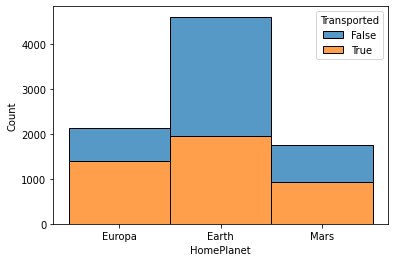

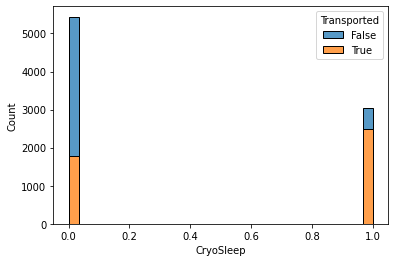

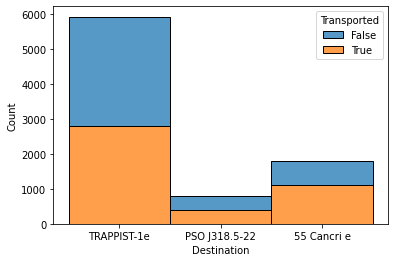

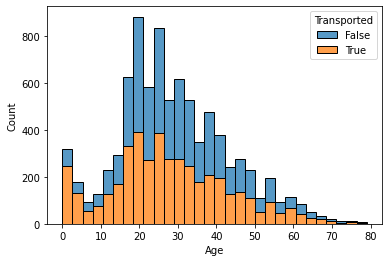

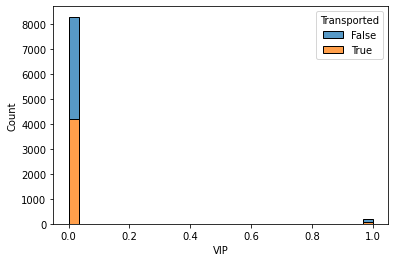

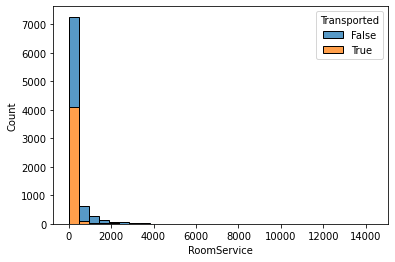

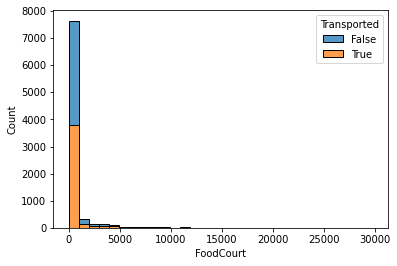

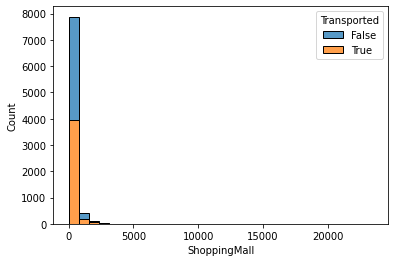

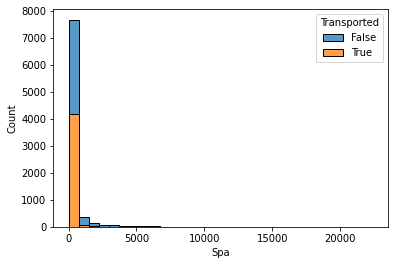

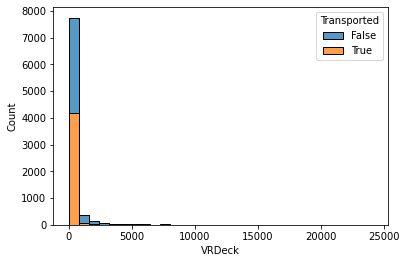

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

feats = ['HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spend']


def plot_dist():
  for feat in feats:
    sns.histplot(data=df, x=feat, bins=30, kde=False, hue='Transported', multiple='stack')
    plt.show()

plot_dist()

### Clean the data 
---
* identify important columns and remove N/A's if necessary

In [ ]:
df.columns

In [ ]:
# lots of important predictors eg VIP contain null, so N/A's are going to be removed from the dataset 

df = df.dropna(subset = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'])
df.count()

PassengerId     6764
HomePlanet      6764
CryoSleep       6764
Cabin           6764
Destination     6764
Age             6764
VIP             6764
RoomService     6764
FoodCourt       6764
ShoppingMall    6764
Spa             6764
VRDeck          6764
Name            6606
Transported     6764
dtype: int64

### Create total spend column
--- 
To make things easy lets summarise the onboard spending 

In [ ]:
df['total_spend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] +df['Spa'] + df['VRDeck'] 

### Dummy code the columns 
---


In [ ]:
import operator 

# define the operator function 

def use_operator(a,b,op):
    map = {'>': operator.gt, '>=': operator.ge,
                '==': operator.eq, '<': operator.lt, '<=': operator.le}
    return map[op](a,b)


df2 = df.copy()


# encode functions 

def encode(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  op = kwds['op']
  if use_operator(df[key], indicator, op):
    return 1
  else:
    return 0
  return


def encode_planet(df, **kwds):
  col = kwds['col']
  str1 = kwds['str1']
  str2 = kwds['str2']
  if df[col] == str1:
    return 0 
  elif df[col] == str2:
    return 1
  else:
    return 2


# encoding the columns

df2['room'] = df2['Cabin'].str.split('/').str.get(0)
df2['floor'] = df2['Cabin'].str.split('/').str.get(1)
df2['deck'] = df2['Cabin'].str.split('/').str.get(2)
df2['planets'] = df2.apply(encode_planet, axis=1, col = "Destination", str1="TRAPPIST-1e", str2='PSO J318.5-22')
df2['home'] = df2.apply(encode_planet, axis=1, col = 'HomePlanet', str1='Earth', str2='Mars')
df2['Transported'] = df2.apply(encode, axis=1, op="==", key='Transported', indicator=True)
df2['VIP'] = df2.apply(encode, axis=1, op="==",key='VIP', indicator=True)
df2['CryoSleep'] = df2.apply(encode, axis=1, op="==", key='CryoSleep', indicator=True)
df2['spend_yes'] = df2.apply(encode, axis=1, op=">",key='total_spend', indicator=0)
df2['age_old'] = df2.apply(encode, axis=1, op=">",key='Age', indicator=df2['Age'].mean())
df2['deck'] = df2.apply(encode, axis=1, op='==', key='deck', indicator='P')

df2['floor'] = df2['floor'].apply(pd.to_numeric)

df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,total_spend,room,floor,deck,planets,home,spend_yes,age_old
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,Maham Ofracculy,0,0.0,B,0,1,0,2,0,1
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,Juanna Vines,1,736.0,F,0,0,0,0,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,Altark Susent,0,10383.0,A,0,0,0,2,1,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,Solam Susent,0,5176.0,A,0,0,0,2,1,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,Willy Santantines,1,1091.0,F,1,0,0,0,1,0


In [ ]:
df2.columns

### Prepare for model
---

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size = 0.30, random_state=2)

In [ ]:
train.describe()

### Finding proportions
---
In order to identify which columns have potentially predictive power, I will need to find the proportions of each column which were transported 

A good indicator is one that is >70% 

In [ ]:
# defining proportion functions 

def get_prop(df, col,op, ind, trans):
  prop = df[(use_operator(df[col],ind, op)) & (df['Transported'] == trans)][col].count()/df[(use_operator(df[col],ind, op))][col].count()*100
  return prop


def get_prop_dual(df, col1,col2,op, ind1,ind2, trans):
  prop = df[(use_operator(df[col1],ind1, op)) &(use_operator(df[col2],ind2,op)) & (
      df['Transported'] == trans)][col1].count()/df[(use_operator(df[col1],ind1, op)) &(use_operator(df[col2],ind2,op))][col1].count()*100
  return prop


In [ ]:
df[(df[col] == indicator]) & df['transported'] == 1_or_0][col].count() / df[df[col] == indicator][col].count() * 100 
# if using transported == 1 for example, to get the value when transported == 0 just do 1 minus (-) the proportion youve aleady found

In [ ]:
#Using the total spend column - those who spent anything and those who didnt (0)



spend_above = get_prop(train, 'total_spend','>', 0, 1)
spend_below = get_prop(train, 'total_spend','<=', 0, 1)
spend_above_die = get_prop(train, 'total_spend','>', 0, 0)
spend_below_die = get_prop(train, 'total_spend','<=', 0, 0)


print(spend_above, spend_below, spend_above_die, spend_below_die)


In [ ]:
# Age as an indicator?

age_above = get_prop(train, 'age_old', '==', 1, 1)
age_below = get_prop(train, 'age_old', '==', 0, 1)
age_above_not = get_prop(train, 'age_old', '==', 1, 0)
age_below_not = get_prop(train, 'age_old', '==', 0, 0)

print(age_above, age_below, age_above_not, age_below_not)

#not a good indicator

In [ ]:
# cabins?

cab_p = get_prop(train, 'deck', '==', 0, 1)
cab_s = get_prop(train, 'deck', '==', 1, 1)


print(cab_p, cab_s, cab_p_die, cab_s_die)

#not a good indicator

In [ ]:
# VIP?

vip_y = get_prop(train, 'VIP', '==', 1, 1)
vip_n = get_prop(train, 'VIP', '==', 0, 1)
vip_y_die = get_prop(train, 'VIP', '==', 1, 0)
vip_n_die = get_prop(train, 'VIP', '==', 0, 0)

print(vip_y, vip_n, vip_y_die, vip_n_die)

#not a good indicator

In [ ]:
# cryo?

cry_y = get_prop(train, 'CryoSleep', '==', 1, 1)
cry_n = get_prop(train, 'CryoSleep', '==', 0, 1)
cry_y_die = get_prop(train, 'CryoSleep', '==', 1, 0)
cry_n_die = get_prop(train, 'CryoSleep', '==', 0, 0)

print(cry_y, cry_n, cry_y_die, cry_n_die)

#good indicator > 80% of those in Cryo were transported 

In [ ]:
# Lets see if their destination made a difference 

one = get_prop(train, 'planets', '==', 1, 0)
two = get_prop(train, 'planets', '==', 2, 0)
zero = get_prop(train, 'planets', '==', 0, 0)

print(one,two,zero, 100-one, 100-two, 100-zero)

# bad indicators all ~50% 

In [ ]:
# or their origin?

one = get_prop(train, 'home', '==', 0, 1) # 65%?
two = get_prop(train, 'home', '==', 1, 1)
zero = get_prop(train, 'home', '==', 2, 1)

print(one,two,zero, 100-one, 100-two, 100-zero)

# mostly bad indicator ~50%

In [ ]:
# lets try VIP and spending 


vip_spend_y_y = get_prop_dual(train, 'spend_yes','VIP', '==', 1, 1, 1 ) #30
vip_spend_y_n = get_prop_dual(train, 'spend_yes','VIP', '==', 0, 1, 1 )#90
vip_spend_n_y = get_prop_dual(train, 'spend_yes','VIP', '==', 1, 0, 1 )#29
vip_spend_n_n = get_prop_dual(train, 'spend_yes','VIP', '==', 0, 0, 1 )#77
vip_spend_y_y_die = get_prop_dual(train, 'spend_yes','VIP', '==', 1, 1, 0 ) #69
vip_spend_y_n_die = get_prop_dual(train, 'spend_yes','VIP', '==', 0, 1, 0) #10%
vip_spend_n_y_die = get_prop_dual(train, 'spend_yes','VIP', '==', 1, 0, 0 ) #70%
vip_spend_n_n_die = get_prop_dual(train, 'spend_yes','VIP', '==', 0, 0, 0 ) #22%


print(vip_spend_y_y, vip_spend_y_n,vip_spend_n_y ,vip_spend_n_n ,vip_spend_y_y_die,vip_spend_y_n_die ,vip_spend_n_y_die,vip_spend_n_n_die)


# Good indicator, 90% of those who didnt spend but were in VIP were transported 

In [ ]:
# What about destination and cryo 
zero_cry = get_prop_dual(train, 'planets', 'CryoSleep', '==', 0, 1, 1)
one_cry = get_prop_dual(train, 'planets', 'CryoSleep', '==', 1, 1, 1)
two_cry = get_prop_dual(train, 'planets', 'CryoSleep', '==', 2, 1, 1)

zero_cry2 = get_prop_dual(train, 'planets', 'CryoSleep', '==', 0, 0, 1)
one_cry2 = get_prop_dual(train, 'planets', 'CryoSleep', '==', 1, 0, 1)
two_cry2 = get_prop_dual(train, 'planets', 'CryoSleep', '==', 2, 0, 1)


print(zero_cry, one_cry, two_cry)
print(zero_cry2, one_cry2, two_cry2)
# Very good indicator - 93% of those from going to planet 0 in cryo were transported 


In [ ]:
# destination & origin?

zero_zero = get_prop_dual(train, 'home', 'planets', '==', 0, 0, 1)
zero_one = get_prop_dual(train, 'home', 'planets', '==', 0, 1,1)
zero_two = get_prop_dual(train, 'home', 'planets', '==', 0, 2, 1)  # only worthy indicator - 76% of people from earth going to planet 2 transported
print(zero_zero, zero_one, zero_two)

# could the significance be more about coming from earth as all of the earth ones are >60 and earth alone is 65% (see above)

zero_zero2 = get_prop_dual(train, 'home', 'planets', '==', 1, 1, 1)
zero_one2 = get_prop_dual(train, 'home', 'planets', '==', 1, 0,1)
zero_two2 =get_prop_dual(train, 'home', 'planets', '==', 2, 0, 1)
zero2 =get_prop_dual(train, 'home', 'planets', '==', 2, 2, 1)

print(zero_zero2, zero_one2, zero_two2, zero2)

In [ ]:
def get_prop_3(df, col1,col2,col3,op, ind1,ind2,ind3, trans):
  prop = df[(use_operator(df[col1],ind1, op)) &(use_operator(df[col2],ind2,op)) &(use_operator(df[col3],ind3,op))& (df['Transported'] == trans)][col1].count()/df[(use_operator(df[col1],ind1, op)) &(use_operator(df[col2],ind2,op)&(use_operator(df[col3],ind3,op)))][col1].count()*100
  return prop

pyy = get_prop_3(train, 'spend_yes','VIP','deck', '==', 1, 1, 1,1 ) 
pny = get_prop_3(train, 'spend_yes','VIP', 'deck', '==', 0, 1, 1, 1) # high cos of the other 2, the cabin makes little difference
pyn = get_prop_3(train, 'spend_yes','VIP', 'deck', '==', 1, 0, 1 ,1 )
pnn = get_prop_3(train, 'spend_yes','VIP', 'deck', '==', 0, 0,1, 1 )
pyy_die = 100-pyy
pny_die = 100-pny
pyn_die = 100-pyn
pnn_die=100-pnn

syy = get_prop_3(train, 'spend_yes','VIP','deck', '==', 1, 1, 0,1 ) 
sny = get_prop_3(train, 'spend_yes','VIP', 'deck', '==', 0, 1, 0, 1) # high cos of the other 2, the cabin makes little difference
syn = get_prop_3(train, 'spend_yes','VIP', 'deck', '==', 1, 0, 0 ,1 )
snn = get_prop_3(train, 'spend_yes','VIP', 'deck', '==', 0, 0,0, 1 )
syy_die = 100-syy
sny_die = 100-sny
syn_die = 100-syn
snn_die=100-snn

print(pyy,pny, pyn, pnn, pyy_die,pny_die, pyn_die, pnn_die)
print(syy, sny, syn, snn, 100-syy, 100-sny, 100-syn, 100-snn)

# cabin has little impact, numbers are very similar no matter which cabin

### THE TREE
----

In [ ]:
def get_transported(df):

  if (df['CryoSleep'] == 1) or (df['spend_yes'] ==0 ) :
    return 1 
  else:
    return 0 


# adding earth clause brings it down to 45% 
# | ((df['CryoSleep'] == 1) & (df['planets'] ==1)) ---- doesnt increase it 
#   if df['RoomService'] >1000: return 0 doesnt change it 




correct=0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_transported(test.iloc[i])
  if species == test.iloc[i]['Transported']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 




Proportion correctly identified 0.738423645320197


### Lets validate using some libraries...
----


In [ ]:
x = df2[['CryoSleep', 'floor','deck', 
       'VIP','total_spend', 'planets', 'home','spend_yes', 'age_old']]
y = df2['Transported']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [ ]:
x

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


So I am actually getting better accuary than sklearn! 

### Improving the tree
---



In [ ]:
train.describe()

In [ ]:


spend_above = get_prop(train, 'total_spend','>',0, 1)
spend_below = get_prop(train, 'total_spend','<=', 0, 1)


print(spend_above, spend_below, 100-spend_above, 100-spend_below)

In [ ]:
# lets break the spending down...


spend_above = get_prop(train, 'RoomService','>', 1000, 1)
spend_below = get_prop(train, 'RoomService','<=', 1000, 1)


print(spend_above, spend_below, 100-spend_above, 100-spend_below)

# all other spending indicators the proportion gets worse when you increase the indicator but with room service it shows less so the more you spent on room service the less likely it was youd be transporteds

In [ ]:
spend_above = get_prop(train, 'FoodCourt','>', 0, 1)
spend_below = get_prop(train, 'FoodCourt','<=', 0, 1)

print(spend_above, spend_below, 100-spend_above, 100-spend_below)

In [ ]:
spend_above = get_prop(train, 'ShoppingMall','>', 0, 1)
spend_below = get_prop(train, 'ShoppingMall','<=', 0, 1)

print(spend_above, spend_below, 100-spend_above, 100-spend_below)

In [ ]:
spend_above = get_prop(train, 'Spa','>', 100, 1)
spend_below = get_prop(train, 'Spa','<=', 100, 1)


print(spend_above, spend_below, 100-spend_above, 100-spend_below)

In [ ]:
spend_above = get_prop(train, 'VRDeck','>', 100, 1)
spend_below = get_prop(train, 'VRDeck','<=', 100, 1)

print(spend_above, spend_below, 100-spend_above, 100-spend_below)

So breaking spending down makes no difference lets try some interactions 

In [ ]:
train.columns

In [ ]:
train.info()

In [ ]:
# correlation matrix to see if any of the variables have interactions to indicate possible proportions 
import seaborn as sns 
correlation_matrix = train[['Age', 'VIP', 'floor','deck', 'planets', 'home', 'spend_yes', 'CryoSleep', 'Transported']].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# home & floor?

In [ ]:
y = get_prop(train, 'floor', '==', 1, 1)
n = get_prop(train, 'floor', '==', 0, 1)

print(y, n)

In [ ]:
yy = get_prop_dual(train, 'floor', 'home', '==', 1, 0, 1)
nn = get_prop_dual(train, 'floor', 'home', '==', 0, 0, 1)

print(yy,nn)

# no one on floor 1 from earth was transported and 75% of those on floor 2 were!

yy1 = get_prop_dual(train, 'floor', 'home', '==', 1, 1, 1)
nn1 = get_prop_dual(train, 'floor', 'home', '==', 0, 1, 1)

# no one from planet 1 on floor 0 was transported 
print(yy1,nn1)

yy2 = get_prop_dual(train, 'floor', 'home', '==', 1, 2, 1)
nn2 = get_prop_dual(train, 'floor', 'home', '==', 0, 2, 1)
# no one from planet 2 on floor 0 was transported 

print(yy2,nn2)


In [ ]:
def get_trans(df):
  if ((df['floor'] == 0) & (df['home'] == 0))|((df['floor'] == 1) & (df['home'] == 2)):
        return 1 
  if (df['CryoSleep'] == 1) | ((df['VIP'] == 1) & (df['spend_yes'] ==0 )):
        return 1 
  else:
      return 0 


# adding earth clause brings it down to 45% 
# | ((df['CryoSleep'] == 1) & (df['planets'] ==1)) ---- doesnt increase it 
#   if df['RoomService'] >1000: return 0 doesnt change it 
# elif df['RoomService'] > 100 or df['Spa'] > 100 or df['VRDeck'] > 100: return 0  doesnt improve it 



correct=0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_trans(test.iloc[i])
  if species == test.iloc[i]['Transported']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 